In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk87 import rk_error_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

def plot_shape_of_errors(continuous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continuous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name} - plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (   res, 
        crk8_continous_sol,
        crk7_continous_sol,
        hb8_continous_sol,
        hb10_continous_sol) = rk_error_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp


    crk8_computed_solutions = [crk8_continous_sol.eval(x) for x in t_eval]
    hb8_computed_solutions = [hb8_continous_sol.eval(x) for x in t_eval]
    hb10_computed_solutions = [hb10_continous_sol.eval(x) for x in t_eval]
    actual_solutions = solution(t_eval)

    plt.figure()
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, crk8_computed_solutions, label="crk8")
    plt.plot(t_eval, hb8_computed_solutions, label="hb8")
    plt.plot(t_eval, hb10_computed_solutions, label="hb10")
    plt.plot(t_eval, actual_solutions, label="solution")
    plt.title("solution vs interpolants")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    crk8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk8_computed_solutions, actual_solutions)]
    hb8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb8_computed_solutions, actual_solutions)]
    hb10_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb10_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, crk8_error, label="crk8 error")
    plt.plot(t_eval, hb8_error, label="hb8 error")
    plt.plot(t_eval, hb10_error, label="hb10 error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    plot_shape_of_errors(crk8_continous_sol, solution, "crk8")
    plot_shape_of_errors(hb8_continous_sol , solution, "hb8")
    plot_shape_of_errors(hb10_continous_sol , solution, "hb10")

    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

nsteps = 14
nsuccessful_steps = 14
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 1.0101010101010102 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 1.1111111111111112 is outside of the solution range: 0.001 <= x <= 2.0

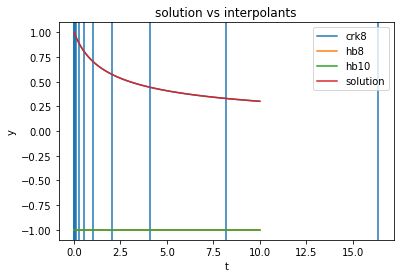

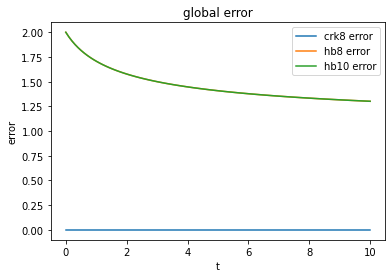

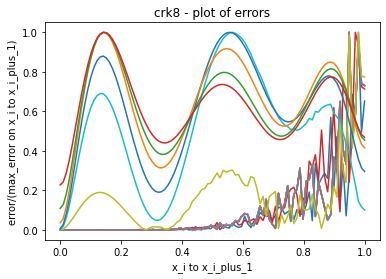

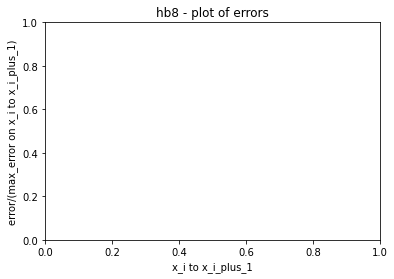

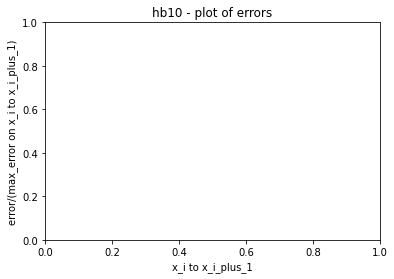

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
6.661338147750939e-16
3.774758283725532e-15
7.631673071273326e-13
1.0214251666695873e-10
4.127976072076933e-09
4.795599745088808e-08
1.9942213402845965e-07
4.104916118963242e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 17
nsuccessful_steps = 16
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 1.0101010101010102 is outside of the solution range: 0.001 <= x <= 3.583
ERROR: 1.1111111111111112 is outside of the solution range: 0.001 <= x <= 3.5

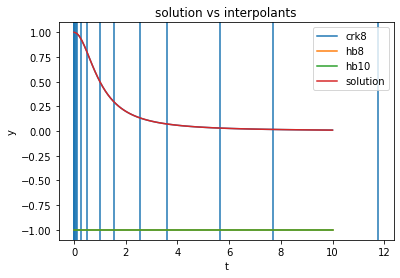

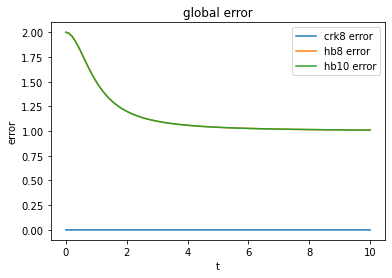

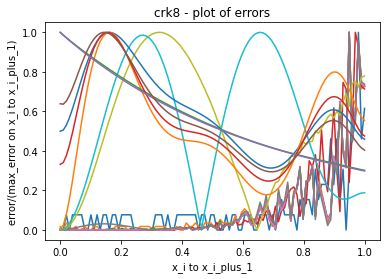

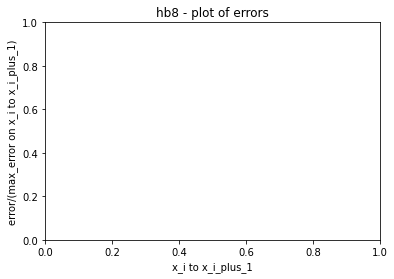

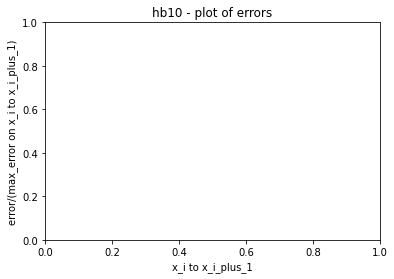

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.4876988529977098e-13
5.201292729850593e-10
4.453000090887116e-08
4.0991061878159485e-08
6.803730033533295e-06
2.052572071489789e-06
2.9346678780753366e-06
8.769315064070804e-07
5.548019331872225e-07


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 15
nsuccessful_steps = 14
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 1.0101010101010102 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 1.1111111111111112 is outside of the solution range: 0.001 <= x <= 2.0

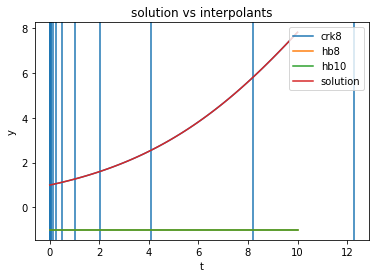

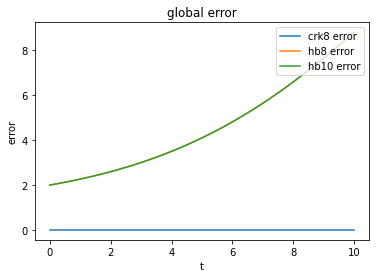

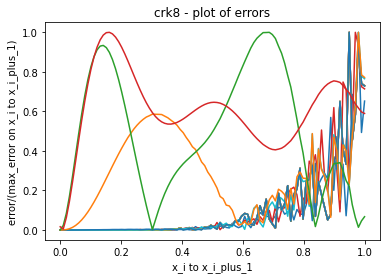

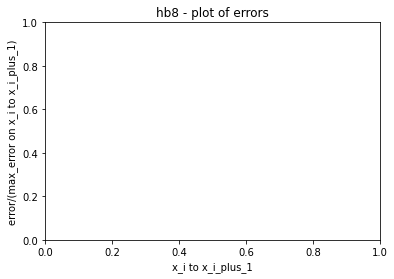

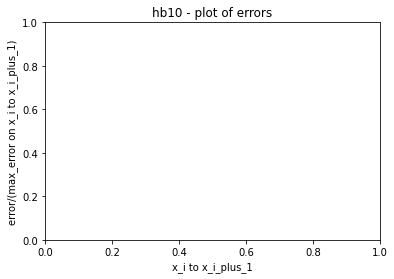

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
1.1102230246251565e-15
2.6645352591003757e-15
9.325873406851315e-15
8.076650459543089e-12
4.706611100857572e-09
1.66571375359581e-07


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 481
nsuccessful_steps = 316
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 9.919000000000008
ERROR: 1.0101010101010102 is outsid

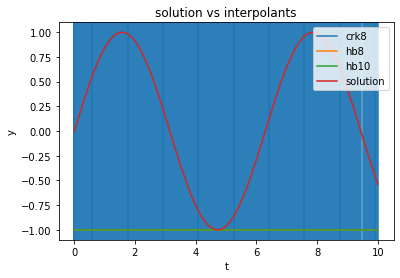

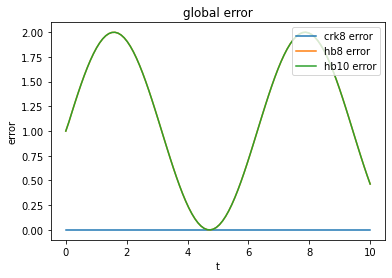

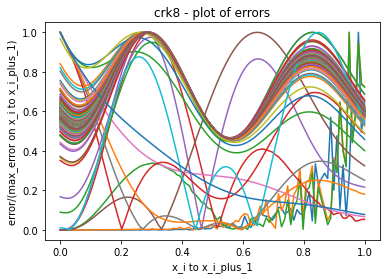

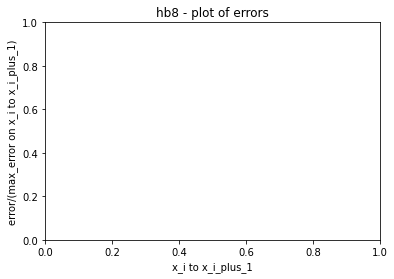

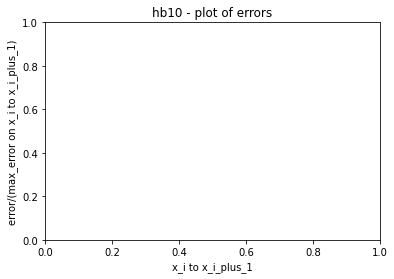

0.0
3.7947076036992655e-19
6.516055056637882e-17
1.7143404751340796e-14
7.3293229124749e-12
2.7502406046986394e-09
7.129758142418452e-07
4.793769310673657e-08
1.2058916115664786e-08
2.1480713568999832e-08
2.780492941445445e-08
3.393561562314851e-08
4.002320611040666e-08
4.606945469554091e-08
5.206850572925248e-08
5.801425428941798e-08
6.39006358937877e-08
6.972150540240918e-08
7.54710857697738e-08
8.114331273567643e-08
8.673250267987598e-08
9.223285390991265e-08
9.76388033757658e-08
1.0294474550587296e-07
1.0814529971536757e-07
1.1323508619653921e-07
1.182090015872106e-07
1.230618200676048e-07
1.2778865599027966e-07
1.3238462881481894e-07
1.368450666117127e-07
1.4116536783959077e-07
1.453411521135095e-07
1.493680995556801e-07
1.5324214619472087e-07
1.569592181782653e-07
1.6051563578312056e-07
1.63907704298083e-07
1.6713192607653582e-07
1.7018501452525925e-07
1.7306387245508148e-07
1.757654922718288e-07
1.7828715237477866e-07
1.8062627749060312e-07
1.827804518850229e-07
1.84747453668698

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 167
nsuccessful_steps = 107
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 9.855000000000008
ERROR: 1.0101010101010102 is outsid

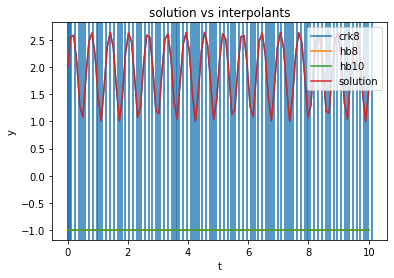

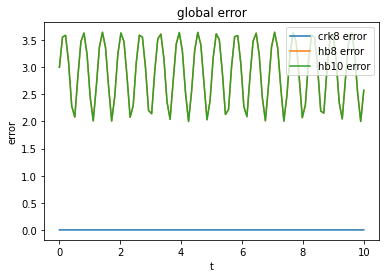

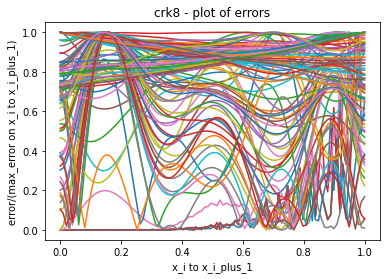

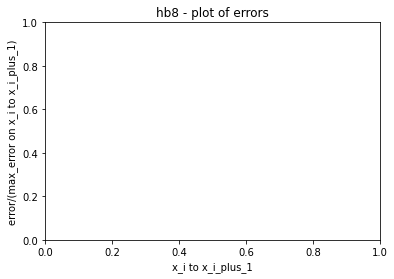

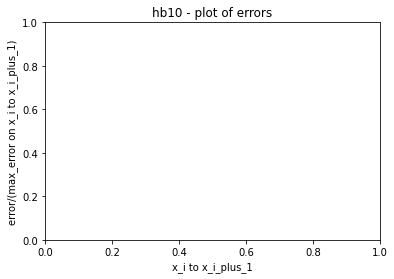

0.0
0.0
0.0
4.440892098500626e-16
0.0
4.440892098500626e-16
6.661338147750939e-15
1.7497114868092467e-13
3.2521985104949636e-10
1.8091364983874314e-07
2.5065198450135995e-07
2.155707581330546e-07
1.39257997799902e-07
4.429596645039169e-08
4.1696909924837655e-08
5.559546045752484e-08
7.595730844300874e-08
1.0203751976689546e-07
2.518180666211123e-07
5.673137857264976e-07
4.6331876957239615e-07
5.44983047134906e-07
1.7210363334463352e-07
2.4557095157362596e-07
5.267262006558582e-07
9.365830764274108e-07
7.915906001798589e-07
9.640501001939583e-07
2.971919510486032e-07
4.602476371129427e-07
6.159244259063001e-07
8.864610467895773e-07
7.750471073819654e-07
9.778183982511734e-07
5.185251197303842e-07
4.169895662098355e-07
1.826507154412127e-07
2.2444384972786224e-07
2.0263074063109343e-07
2.6491265447958767e-07
3.5570928114125877e-07
4.994657074597342e-07
5.322923128936452e-07
4.081659654708858e-07
4.403340012615331e-07
4.1130913386311363e-07
5.571604628773486e-07
7.626810534233641e-07
1.04

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 14
nsuccessful_steps = 14
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 1.0101010101010102 is outside of the solution range: 0.001 <= x <= 2.047
ERROR: 1.1111111111111112 is outside of the solution range: 0.001 <= x <= 2.0

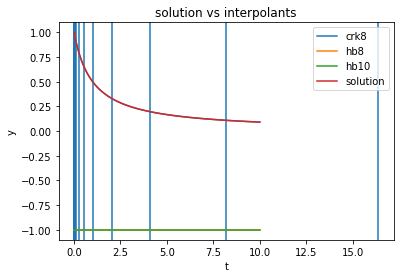

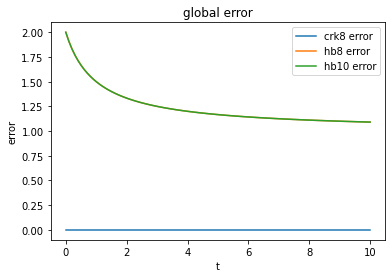

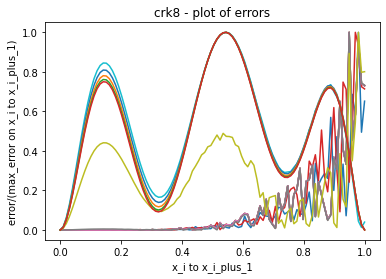

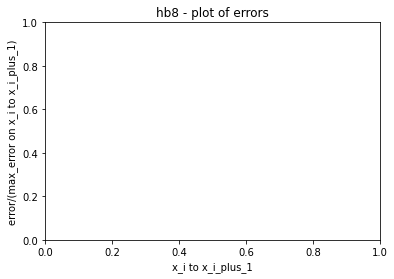

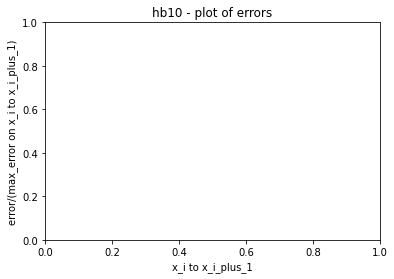

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
1.5543122344752192e-15
1.2212453270876722e-15
4.773959005888173e-15
4.052314039881821e-15
2.270406085358445e-14
2.4591439995447217e-14
2.743638649604918e-14
1.830480211850727e-14


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 17
nsuccessful_steps = 15
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 4.095000000000001
ERROR: 1.0101010101010102 is outside 

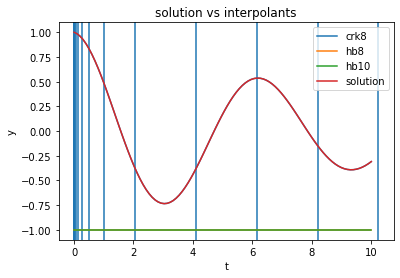

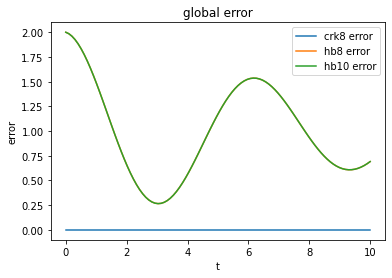

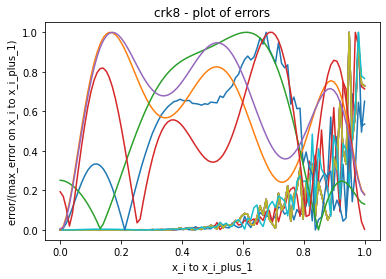

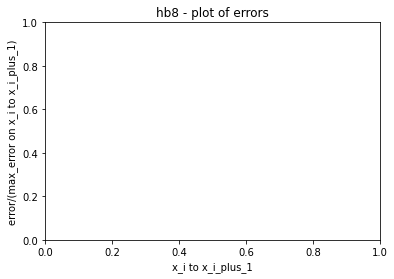

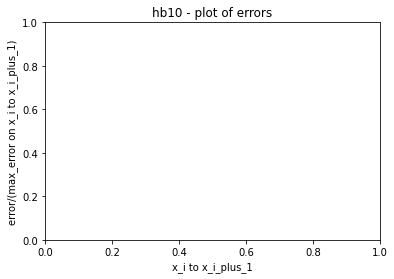

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.771561172376096e-16
1.3322676295501878e-15
4.4797499043625066e-14
1.0586143073254561e-11
3.715587032493417e-08
1.9386313221403384e-08
7.280599179093628e-10
1.9003893514391024e-08


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 19
nsuccessful_steps = 18
integration complete
ERROR: 0 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.10101010101010101 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.20202020202020202 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.30303030303030304 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.40404040404040403 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.5050505050505051 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.6060606060606061 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.7070707070707071 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.8080808080808081 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 0.9090909090909091 is outside of the solution range: 0.001 <= x <= 5.119000000000001
ERROR: 1.0101010101010102 is outside 

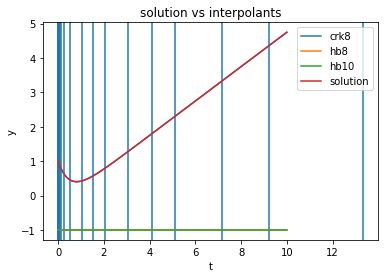

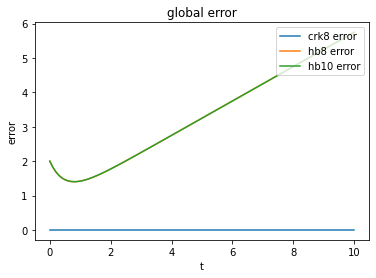

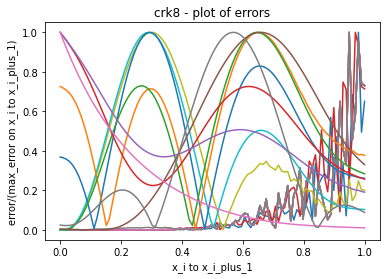

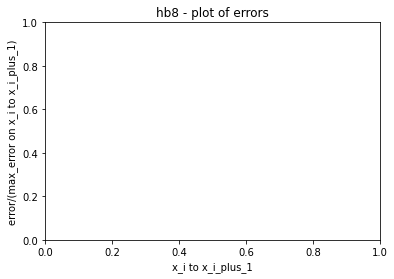

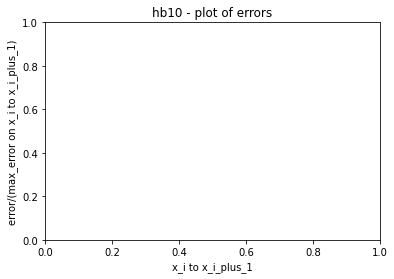

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
3.3306690738754696e-16
5.10702591327572e-15
2.6423307986078726e-14
1.6973311645074318e-11
6.989622935993367e-09
5.018490512043172e-09
2.7032744931432262e-09
3.132437278452471e-07
8.076291790892753e-08
1.562280038669428e-08
9.868771271293042e-07
1.1068673089198455e-08
4.04564861611334e-08


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)